<h1>R 스스로 해보기 7</h1>
<hr>

<h4>1. 두 개의 변수 mid와 final 성적을 이용하여 4개의 그룹으로 분류한 결과를 출력 (결과는 예시와 다를
수 있음)</h4>

In [1]:
list.files("./../data")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "hw2-2기말성적예측-2022.xlsx"                          
 [8] "merge.xlsx"                                           
 [9] "naver_news(건국대 글로컬).txt"                        
[10] "sample-CP949.csv"                                     
[11] "sample-UTF8.csv"                                      
[12] "sample.xlsx"                                          
[13] "score.xlsx"                                           
[14] "경기도 화성시_관광통계_20231025.csv"                  
[15] "고속터미널-23-05.xlsx"                                
[16] "네이버블로그(충주맛집).txt"                           
[17] "데이터과학-중간고사.xlsx"                             
[18] "실습 설문지.xlsx"                                     
[19] "중고차시세.xlsx"                                      
[20] "화재-피해액.xlsx"

In [2]:
library(readxl)

In [3]:
data <- read_xlsx("./../data/score.xlsx")
data

mid,final,degree
<dbl>,<dbl>,<chr>
98,100,A
94,100,A
93,100,A
93,94,A
94,91,A
86,95,A
90,91,A
80,97,A
86,88,A


In [4]:
data.kmeans <- kmeans(data[1:2], centers = 4, iter.max = 1000)

data.kmeans

K-means clustering with 4 clusters of sizes 10, 3, 9, 21

Cluster means:
       mid    final
1 90.20000 94.30000
2 54.33333 16.00000
3 54.33333 58.66667
4 76.33333 82.66667

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3
[39] 3 2 3 2 2

Within cluster sum of squares by cluster:
[1]  469.700 1196.667 1014.000 2589.333
 (between_SS / total_SS =  82.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

<hr>
<h4>2. 결과 중 cluster의 값을 score$cluster로 저장하고 두 변수 score$degree, score$cluster의 교
차표를 구하시오. (결과는 예시와 다를 수 있음)</h4>

In [5]:
data$cluster <- data.kmeans$cluster

table(data$degree, data$cluster)

   
     1  2  3  4
  A 10  0  0  6
  B  0  0  0 15
  C  0  1  9  0
  D  0  2  0  0

<hr>
<h4>3. 다음 과정에 따라 다음 그래프를 그리시오. (결과는 예시와 다를 수 있음)</h4>

In [6]:
library(ggplot2)

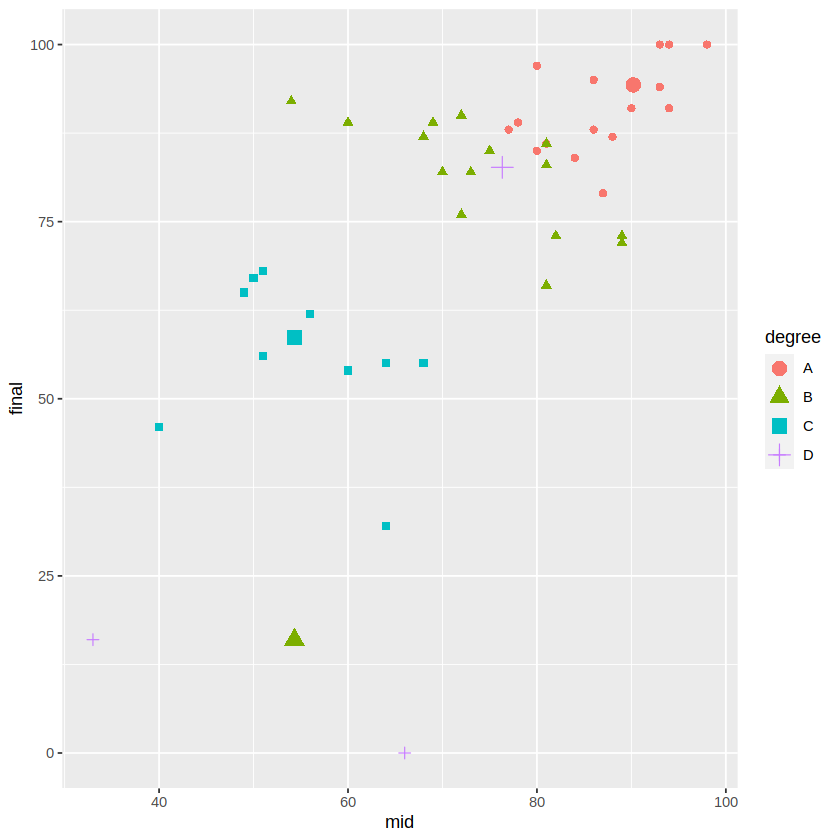

In [7]:
# A.분류분석의 결과 중 중심(centers)의 값(벡터)를 변수 centers에 저장(데이터프레임 형식으로)
centers <- as.data.frame(data.kmeans$centers)

# B.ggplot을 이용하여 데이터 score의 mid와final의 산점도를 그린다. 색상과 점의 모양을 degree에 따라 다르게.
p <- ggplot(data, aes(mid, final))
p <- p + geom_point(aes(color = degree, shape = degree), size = 2)

# C.그 위에 centers의 중심 좌표를 그린다.이때 점의 모양과 색상을 LETTERS[1:4]로지정
p <- p + geom_point(data = centers, aes(mid, final, shape = LETTERS[1:4], color = LETTERS[1:4]), size = 4)

p

<hr>
<h4>4. 아래 그림과 같이 군집별 평행 좌표 그림을 그리시오.</h4>

In [8]:
library(GGally)

Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



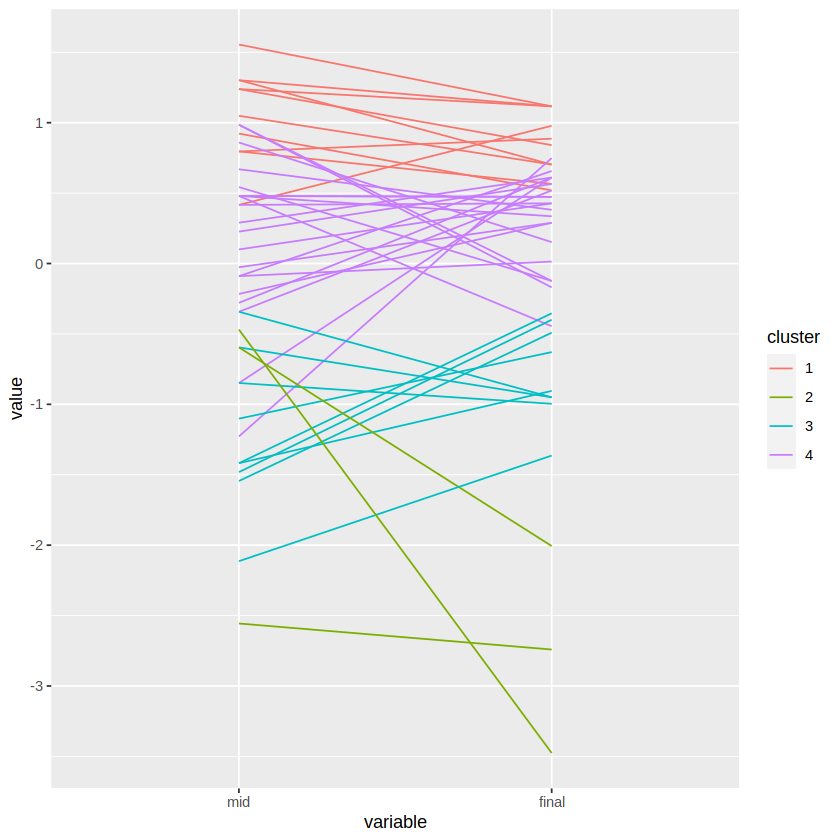

In [9]:
data$cluster <- as.factor(data.kmeans$cluster)

p <- ggparcoord(data = data, columns = c(1:2), groupColumn = 'cluster', scale = 'std')

p

<hr>
<h4>5. 아래 그림과 같이 군집 그래프를 그리시오. (경고 메시지는 무시)</h4>

In [10]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Too few points to calculate an ellipse


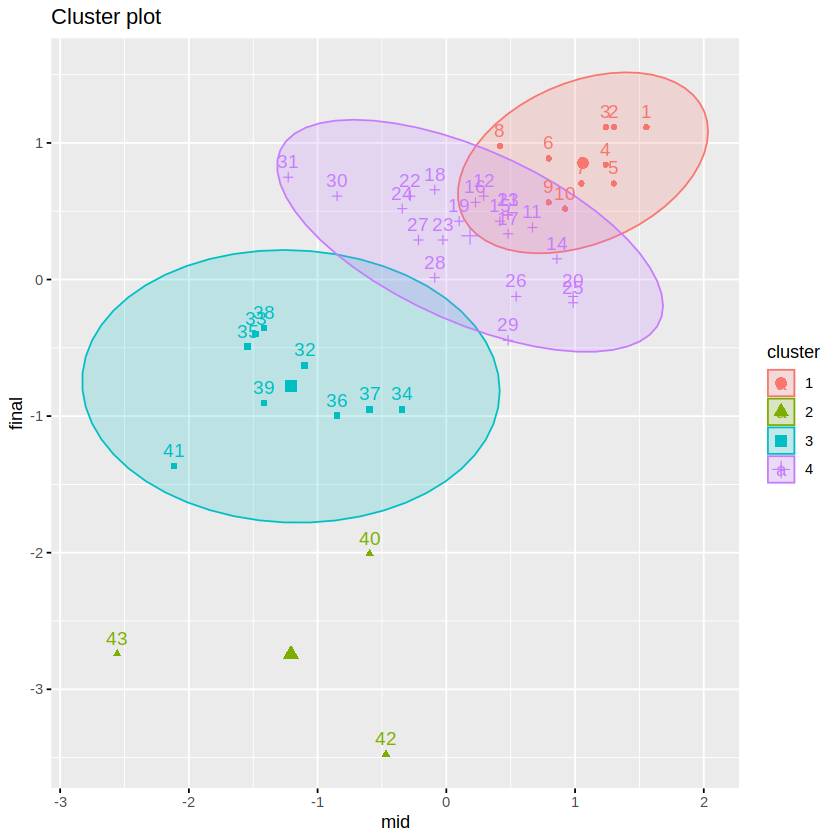

In [11]:
fviz_cluster(data.kmeans, data[1:2], ellipse.type = 'norm')

<hr>
<h4>6. 데이터 “naver_news(건국대_글로컬).txt”를 이용하여 워드클라우드를 그리시오.</h4>

In [12]:
library(KoNLP)

Checking user defined dictionary!




In [13]:
library(wordcloud)

Loading required package: RColorBrewer



In [14]:
list.files("./../data")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "hw2-2기말성적예측-2022.xlsx"                          
 [8] "merge.xlsx"                                           
 [9] "naver_news(건국대 글로컬).txt"                        
[10] "sample-CP949.csv"                                     
[11] "sample-UTF8.csv"                                      
[12] "sample.xlsx"                                          
[13] "score.xlsx"                                           
[14] "경기도 화성시_관광통계_20231025.csv"                  
[15] "고속터미널-23-05.xlsx"                                
[16] "네이버블로그(충주맛집).txt"                           
[17] "데이터과학-중간고사.xlsx"                             
[18] "실습 설문지.xlsx"                                     
[19] "중고차시세.xlsx"                                      
[20] "화재-피해액.xlsx"

In [15]:
text <- readLines("./../data/naver_news(건국대 글로컬).txt", encoding = 'UTF-8')

text[1:20]

[1] "06. 최상위권 수험생, 과탐Ⅱ 응시자 성적 분포를 통한 유불리... "                                                                                                                                                   
 [2] "확장하면 <b>건국대</b>(<b>글로컬</b>), 경상국립대, 부산대, 울산대, 인제대, 충북대, 한림대 등 다수의 대학에서 표준점수를 활용해서 학생들을 선발하고 있다. 다만, 표준점수를 활용하는 대학 모두 유리함이 큰... "    
 [3] ""                                                                                                                                                                                                                
 [4] "편입면접질문 다양 보유한 면접 전문 학원 :  발표 전문 스피치... "                                                                                                                                                 
 [5] "학원 #서울여자간호대 #삼육대 #삼육보건대 #서일대 #신한대 #을지대 #<b>건국대글로컬</b> #인천대 #강원대 #충북대 #지거국 대학교 편입면접질문 다양 보유한 면접 전문 학원 : 발표 전문 스피치 아카데미! 세움스피치... "
 [6] ""                                                                                                                                                                                                                
 [7] "청주대 창업교육센터, 대학혁신지원사업 성과전시회"                                                                                                                                                                
 [8] "청주대는 <b>건국대 글로컬</b>캠퍼스, 서원대와 함께 대학 간 창업 공유·협력과 관련한 MOU 체결에 따라... 7개 대학 11개 창업동아리가 참가한 챌린지에서 청주대 연합동아리는 대상, 건국대 연합동아리는 우수상... "     
 [9] ""                                                                                                                                                                                                                
[10] "2024학년도 고려대 세종 수능 정시 학과별 경쟁률"                                                                                                                                                                  
[11] "com/we2you/4889 건국대 인문 정시지원라인 : https://cafe.naver.com/we2you/4926 건국대 자연... com/we2you/3655 2023 정시등급컷/경쟁률 (<b>건국대 글로컬</b>) : https://cafe.naver.com/we2you/3666... "             
[12] ""                                                                                                                                                                                                                
[13] "2024년 수능 가채점 배치표(대성)2023년 입결로 본 2024년... "                                                                                                                                                      
[14] "※대치동 썬앤태임의 2024학년도, 2025학년도 수능을 위한 다양한 컨설팅을 경험하세요!! 1.2024년 정시 지원 전략 &amp; 합격운 사주 상담 컨설팅! 대치동 25년 입시 컨설턴트의 정시 전략 컨설팅과 사주 명리를 통한... "   
[15] ""                                                                                                                                                                                                                
[16] "지거국 편입면접학원 서울여자간호대 편입면접 준비는... "                                                                                                                                                          
[17] "삼육대, 삼육보건대, 서일대, 신한대, 을지대, <b>건국대글로컬</b>, 인천대, 강원대, 충북대, 지거국 대학교 여러 학교를 목표로 하는 학생분들이 오셔서 면접 질문으로 많이 연습하고 준비도 하고 있는 지거국... "        
[18] ""                                                                                                                                                                                                                
[19] "<b>건국대 글로컬</b> : 모시래 기숙사 최신정보 (후배찬스 / 23년... "                                                                                                                                              
[20] "건국대학교 글로컬캠퍼스 (kku.ac.kr) 건국대학교 생활관 방문을 환영합니다 (kku.ac.kr) 위 사이트에... <b>건국대 글로컬</b> 모시래 기숙사 학식 학교도 결국 먹어야지 다니는 거 아니겠어요? 잘 먹어야 공부도... "

In [16]:
nouns <- sapply(text, extractNoun, USE.NAMES = F)
nouns[1:5]

[[1]]
[1] "06"       "최상위"   "권"       "수험생"   "과탐II"   "응시"     "성적"    
[8] "분포"     "유불리.."

[[2]]
 [1] "확장"                         "<b>건국대</b>(<b>글로컬</b>)"
 [3] "경상"                         "국립대"                      
 [5] "부산"                         "대"                          
 [7] "울산대"                       "인제"                        
 [9] "대"                           "충북대"                      
[11] "한림대"                       "등"                          
[13] "다수"                         "대학"                        
[15] "표준"                         "점수"                        
[17] "활용"                         "해서"                        
[19] "학생"                         "들"                          
[21] "선발"                         "표준"                        
[23] "점수"                         "활용"                        
[25] "대학"                         "유리"                        
[27] "함"                          

[[3]]
[1] ""

[[4]]
 [1] "편입"   "면접"   "질문"   "다양"   "보유"   "한"     "면접"   "전문"  
 [9] "학원"   "발표"   "전문"   "스피치"

[[5]]
 [1] "학원"                 "#서울여자간호대"      "#삼육대"             
 [4] "#삼육보건대"          "#서일대"              "#신한대"             
 [7] "#을지대"              "#<b>건국대글로컬</b>" "#인천대"             
[10] "#강원대"              "#충북대"              "#지거국"             
[13] "대학교"               "편입"                 "면접"                
[16] "질문"                 "다양"                 "보유"                
[19] "한"                   "면접"                 "전문"                
[22] "학원"                 "발표"                 "전문"                
[25] "스피치"               "아카데미"             "세움스피치.."

In [17]:
nouns <- unlist(nouns)
nouns[1:20]

[1] "06"                           "최상위"                      
 [3] "권"                           "수험생"                      
 [5] "과탐II"                       "응시"                        
 [7] "성적"                         "분포"                        
 [9] "유불리.."                     "확장"                        
[11] "<b>건국대</b>(<b>글로컬</b>)" "경상"                        
[13] "국립대"                       "부산"                        
[15] "대"                           "울산대"                      
[17] "인제"                         "대"                          
[19] "충북대"                       "한림대"

In [18]:
nouns <- gsub("\\d+","", nouns)
nouns <- nouns[nchar(nouns) > 1]

nouns[1:20]

[1] "최상위"                       "수험생"                      
 [3] "과탐II"                       "응시"                        
 [5] "성적"                         "분포"                        
 [7] "유불리.."                     "확장"                        
 [9] "<b>건국대</b>(<b>글로컬</b>)" "경상"                        
[11] "국립대"                       "부산"                        
[13] "울산대"                       "인제"                        
[15] "충북대"                       "한림대"                      
[17] "다수"                         "대학"                        
[19] "표준"                         "점수"

In [19]:
wordcount <- table(nouns)

head(sort(wordcount, decreasing = TRUE), 30)

nouns
                        건국                         대학 
                         451                          213 
                        수시                         정시 
                         212                          172 
                        학년                   글로컬</b> 
                         149                          141 
                        의대                         전형 
                         134                          128 
                        합격                         실기 
                         125                          116 
               <b>건국대</b>                       대학교 
                         114                          107 
                      경쟁률 <b>건국대</b>(<b>글로컬</b>) 
                         101                           97 
                        면접                         학생 
                          97                           97 
           <b>건국대</b>학교                       디자인 
                          84           

In [20]:
nouns <- gsub("건국","", nouns)
nouns <- gsub("대학","", nouns)
nouns <- gsub("학년","", nouns)
nouns <- gsub("글로컬</b>","", nouns)
nouns <- gsub("<b>건국대</b>","", nouns)
nouns <- gsub("대학교","", nouns)
nouns <- gsub("<b>건국대</b>(<b>글로컬</b>)","", nouns)
nouns <- gsub("<b>건국대</b>학교","", nouns)
nouns <- gsub("모집","", nouns)
nouns <- gsub("글로컬</b>캠퍼스","", nouns)
nouns <- gsub("부산","", nouns)
nouns <- gsub("<b>대</b> ","", nouns)
nouns <- gsub("경쟁률 <b>대</b>(<b>)","", nouns)
nouns <- gsub("<b>대</b>학교","", nouns)
nouns <- gsub("<b>캠퍼스","", nouns)
nouns <- gsub("com/weyou/","", nouns)
nouns <- gsub("<b>대</b>(<b>)","", nouns)
nouns <- gsub("<b>대</b>","", nouns)
nouns <- gsub("https","", nouns)
nouns <- gsub("(<b>)","", nouns)
nouns <- gsub("()","", nouns)

nouns <- nouns[nchar(nouns) > 1]
wordcount <- table(nouns)
head(sort(wordcount, decreasing = TRUE), 50)

nouns
    수시     정시     의대     전형     합격       ()   캠퍼스     실기 
     212      174      134      128      125      124      118      116 
  경쟁률     면접     학생   디자인     입시     학과     미대     지원 
     101       97       97       81       68       67       66       61 
    편입     등급     반영     지역     학교     정원 간호학과     수능 
      61       56       50       49       45       44       43       40 
    점수   경희대     대구   건양대     준비     고려 미술학원     계명 
      40       39       39       37       37       36       36       35 
    인재   가톨릭     경상     인원     중앙     학원    naver     결과 
      34       33       32       31       31       31       30       30 
  가천대     기초   동국대     cafe     고신   국립대   의예과   경북대 
      28       28       28       27       27       27       27       26 
    사업     성적 
      26       26 

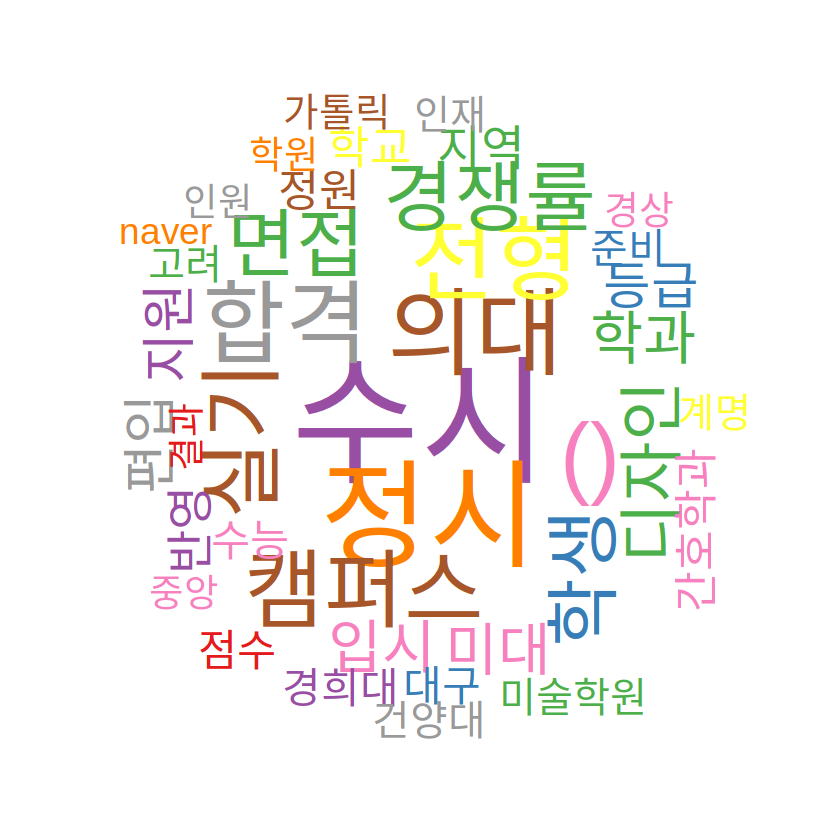

In [21]:
palete <- brewer.pal(9, "Set1")
wordcount <- table(nouns)
wordcloud(names(wordcount), freq = wordcount,scale = c(7, 1),rot.per = 0.25, min.freq = 30, 
          random.order = F, random.color = T, colors = palete)

<hr>
<h4>※ 데이터 “화재-피해액.xlsx”에 대하여 물음에 답하시오.</h4>

In [22]:
list.files("./../data")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "hw2-2기말성적예측-2022.xlsx"                          
 [8] "merge.xlsx"                                           
 [9] "naver_news(건국대 글로컬).txt"                        
[10] "sample-CP949.csv"                                     
[11] "sample-UTF8.csv"                                      
[12] "sample.xlsx"                                          
[13] "score.xlsx"                                           
[14] "경기도 화성시_관광통계_20231025.csv"                  
[15] "고속터미널-23-05.xlsx"                                
[16] "네이버블로그(충주맛집).txt"                           
[17] "데이터과학-중간고사.xlsx"                             
[18] "실습 설문지.xlsx"                                     
[19] "중고차시세.xlsx"                                      
[20] "화재-피해액.xlsx"

In [23]:
data <- read_xlsx("./../data/화재-피해액.xlsx")

data

거리,피해액
<dbl>,<dbl>
3.4,26.6
1.8,17.8
4.6,31.3
2.3,23.1
3.1,27.5
5.5,36.5
0.7,14.1
3.0,22.3
2.6,19.6


<hr>
<h4>7. 두 변수 ‘거리’, ‘피해액’의 상관계수를 구하는 코드</h4>

In [24]:
cor(data)

,거리,피해액
거리,1.0000000,0.9623364
피해액,0.9623364,1.0000000


<hr>
<h4>8. 아래 그림과 같이 산점도와 추세선을 그리는 코드</h4>

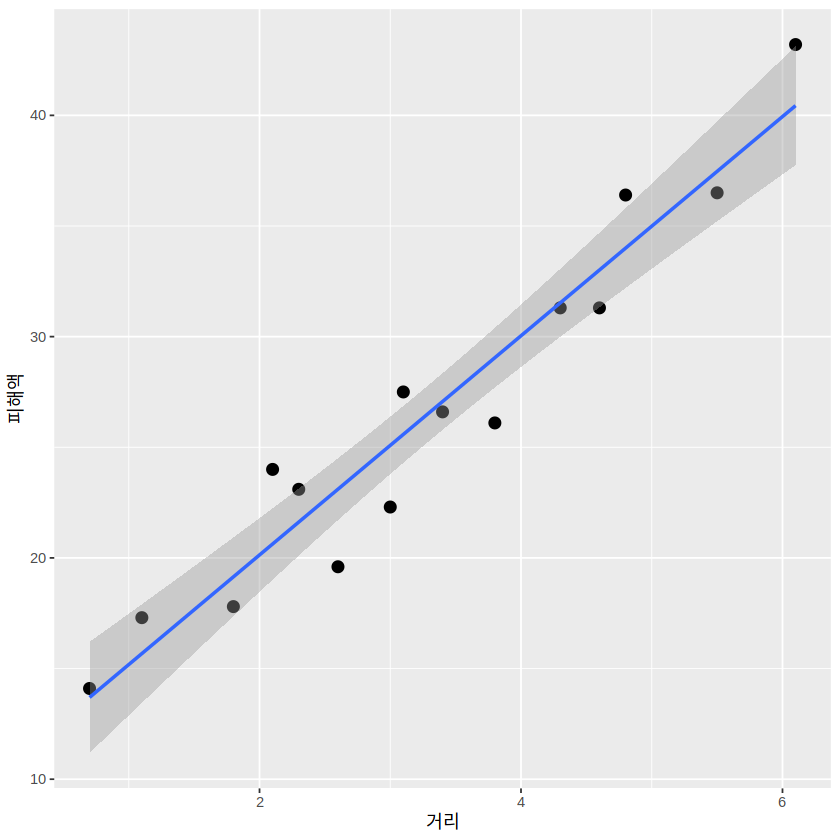

In [25]:
p <- ggplot(data, aes(거리, 피해액))
p + geom_point(size = 3) + geom_smooth(method = 'lm', formula = 'y~x')

<hr>
<h4>9. 설명변수(독립변수)를 ‘거리’, 반응변수(종속변수)를 ‘피해액’으로 하는 회귀분석의 코드</h4>

In [26]:
reg <- lm(피해액 ~ 거리, data = data)
summary(reg)


Call:
lm(formula = 피해액 ~ 거리, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.506 -1.527 -0.225  1.771  3.371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.229      1.403   7.289 6.10e-06 ***
거리           4.953      0.388  12.763 9.94e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.289 on 13 degrees of freedom
Multiple R-squared:  0.9261,	Adjusted R-squared:  0.9204 
F-statistic: 162.9 on 1 and 13 DF,  p-value: 9.943e-09


<hr>
<h4>10. 아래 그림과 같이 산점도와 예측치를 그리는 코드</h4>

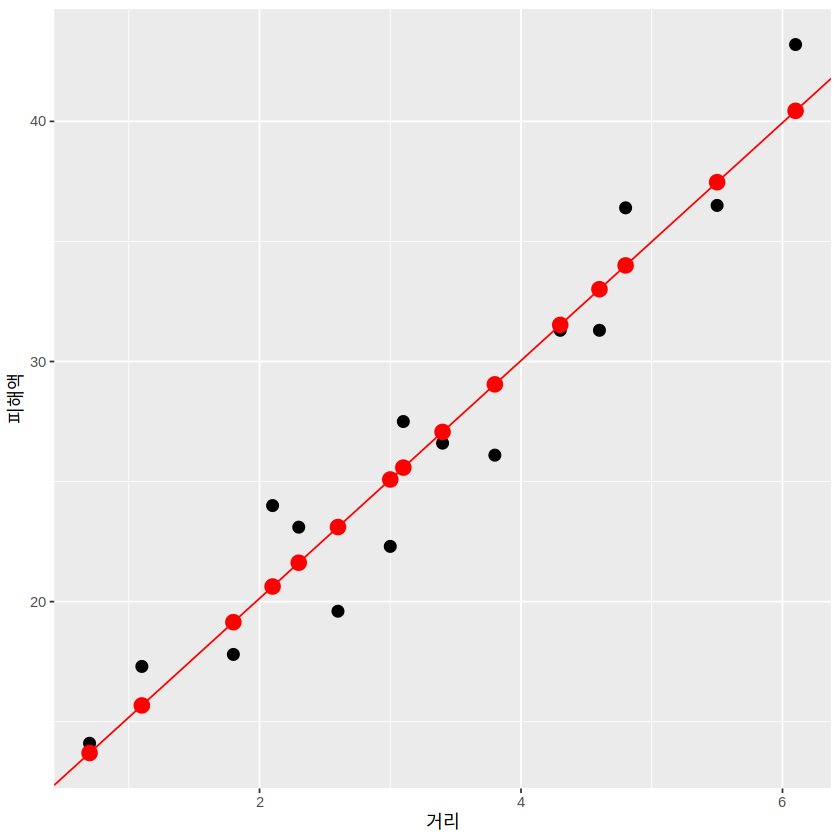

In [27]:
data$fitted <- reg$fitted.values

p <- ggplot(data, aes(거리))
p <- p + geom_point(aes(y = 피해액), size = 3)
p <- p + geom_point(aes(y = fitted), color = 'red', size = 4) + geom_abline(intercept = reg$coefficients[1], slope = reg$coefficients[2], color = 'red')

p

<hr>
<h4>11. 아래 그림과 같이 잔차(residual)의 산점도를 그리는 코드</h4>

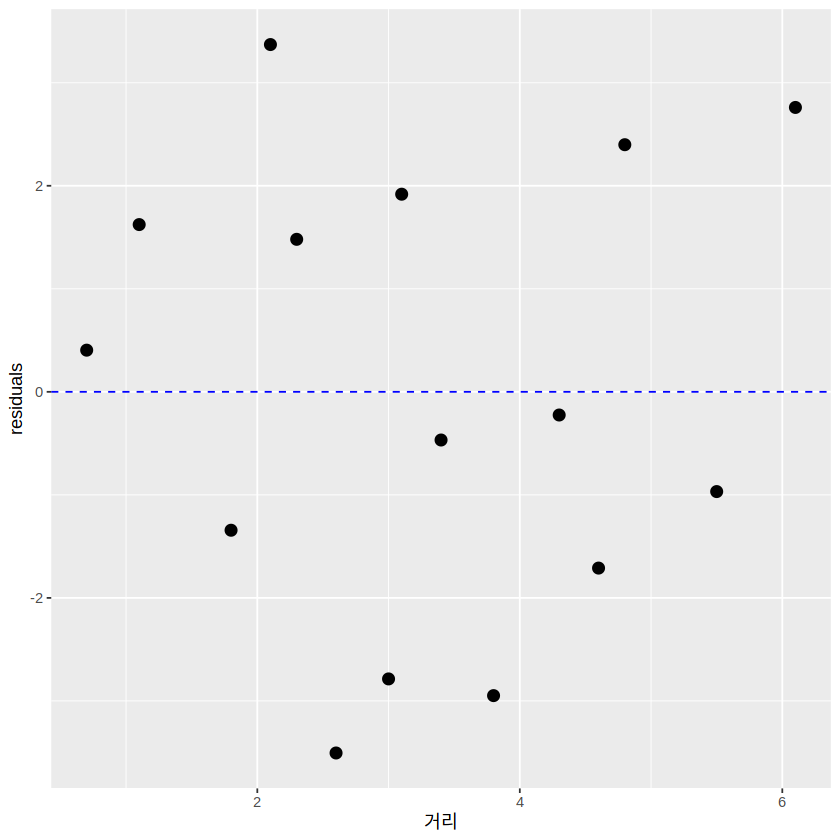

In [28]:
data$residuals <- reg$residuals

p <- ggplot(data, aes(거리, residuals))
p <- p + geom_point(size = 3) + geom_hline(yintercept = 0, color = 'blue', linetype = 2)

p

<hr>
<h4>12. 거리가 1부터 10까지의 피해액의 예측치를 구하는 코드</h4>

In [29]:
x <- data.frame(거리 = 1:10)
x$predict <- predict(reg, x)
x

거리,predict
<int>,<dbl>
1,15.18136
2,20.13398
3,25.08660
4,30.03922
5,34.99184
6,39.94446
7,44.89709
8,49.84971
9,54.80233
